In [1]:
# pip install matplotlib
# pip install scikit-learn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

In [3]:
df = pd.read_csv('data/FuelConsumption.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
feature_df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
feature_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


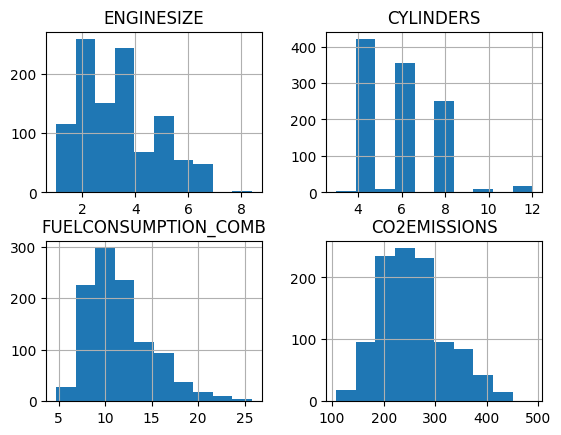

In [7]:
viz = feature_df
viz.hist()
plt.show()

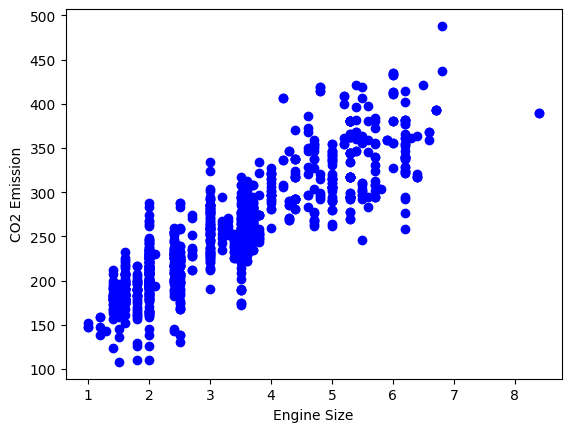

In [8]:
plt.scatter(feature_df.ENGINESIZE, feature_df.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

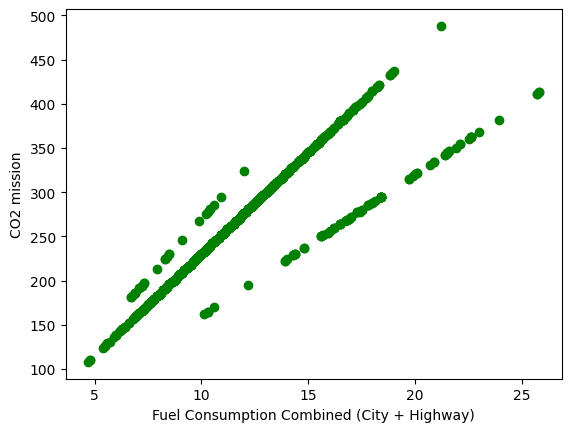

In [9]:
plt.scatter(feature_df.FUELCONSUMPTION_COMB, feature_df.CO2EMISSIONS, color='green')
plt.xlabel('Fuel Consumption Combined (City + Highway)')
plt.ylabel('CO2 mission')
plt.show()

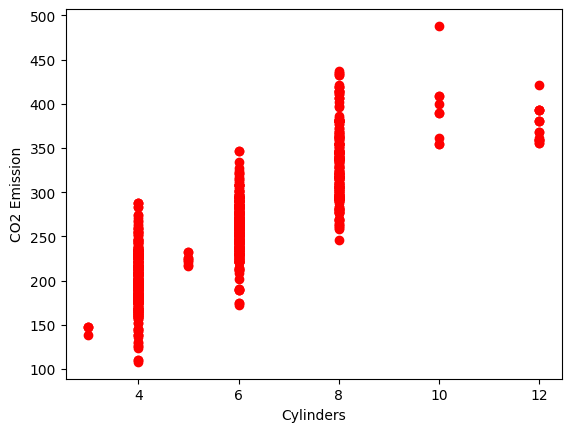

In [10]:
plt.scatter(feature_df.CYLINDERS, feature_df.CO2EMISSIONS, color = 'red')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission')
plt.show()

In [11]:
# # one method of train test splitting
# msk = np.random.rand(len(df)) < 0.8
# train = feature_df[msk]
# test = feature_df[~msk]

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(feature_df, test_size=0.2, random_state=42)

In [13]:
# train.count()

In [14]:
# test.count()

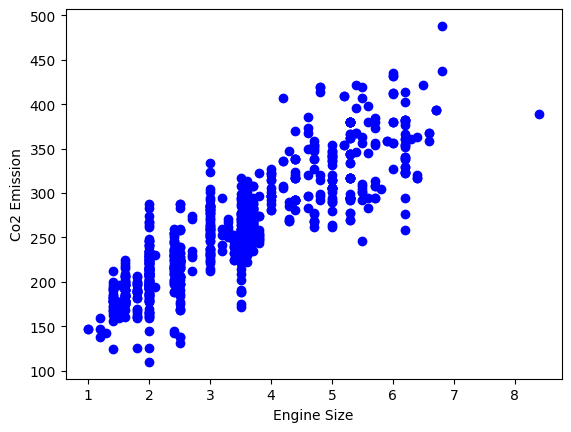

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')
plt.show()

## Predicting Co2 Emissions With respect to Engine Size

In [16]:
# from  sklearn.linear_model import LinearRegression

# model = LinearRegression()
# X_train = np.asanyarray(train[['ENGINESIZE']])
# y_train = np.asanyarray(train[['CO2EMISSIONS']])
# model.fit(X_train, y_train)
# print('Coefficient:', model.coef_)
# print('Intercept:', model.intercept_)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train = train[['ENGINESIZE']]
y_train = train[['CO2EMISSIONS']]
model.fit(X_train, y_train)
print('Coefficents:', model.coef_)
print('Intercept:', model.intercept_)

Coefficents: [[38.99297872]]
Intercept: [126.28970217]


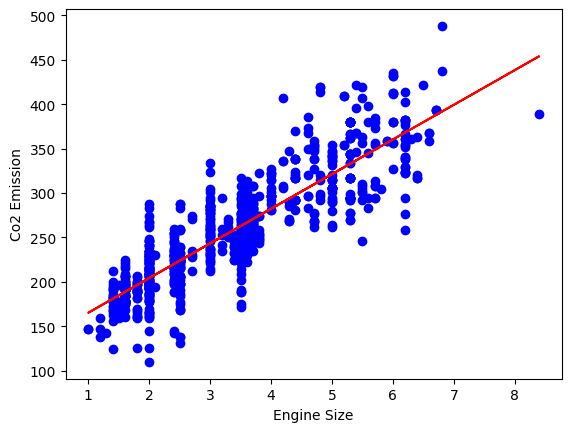

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')
plt.show()

In [19]:
from sklearn.metrics import r2_score

X_test = test[['ENGINESIZE']]
y_test = test[['CO2EMISSIONS']]
pred_y = model.predict(X_test)

print('Mean absolute error: %.2f' % np.mean(np.absolute(pred_y - y_test)))
print('Residual sum of Squares (MSE): %.2f' % np.mean((pred_y - y_test)**2))
print('R2-score: %.2f' % r2_score(y_test, pred_y))

Mean absolute error: 24.10
Residual sum of Squares (MSE): 985.94
R2-score: 0.76


## Predicting Co2 Emissions With respect to Fuel Consumption

In [20]:
from sklearn.model_selection import train_test_split

X = feature_df[['FUELCONSUMPTION_COMB']].values
y = feature_df[['CO2EMISSIONS']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import r2_score

pred_y = model.predict(X_test)
print('Mean absoloute error: ', np.mean(np.absolute(pred_y - y_test)))
print('Residual Sum of Error (MSE): ', np.mean((pred_y - y_test)**2))
print('R2-score: ', r2_score(y_test, pred_y))

Mean absoloute error:  20.441911472549577
Residual Sum of Error (MSE):  797.4346310097206
R2-score:  0.8071474868274242
